In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import ma
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib.ticker import Formatter, FixedLocator
from matplotlib import rcParams
from matplotlib import gridspec

from ZOEE import update_plotstyle
from ZOEE import LatitudeScale
import matplotlib
update_plotstyle()
mscale.register_scale(LatitudeScale)
import seaborn as sns
#matplotlib.rcParams['xtick.minor.size']=0

In [2]:
#Time=GMST['time']
#Control=['xnagb','xnage','xnagh']#['xnagd','xnagf','xnagg']
Forced=['xnagd','xnagf','xnagg']#['xnagb','xnage','xnagh']
Forced_LGM=['xmzke','xmzkg','xmzkh']
LGM_pm = ['xmzkb','xmzkc']
LGM_forc= ['LGM_forc']
PI_forc = ['pi_forc']

In [71]:
EXP = 'EXP03/'
conf = '_conf1'

In [72]:
df_abs=pd.DataFrame()
df_an=pd.DataFrame()
df_abs_list=[]
df_an_list=[]
df_names=[]
for dat in LGM_forc+LGM_pm+PI_forc:#Forced+PI_forc+Forced_LGM+LGM_forc+LGM_pm:
    df_names.append(dat)
    df_abs_list.append(pd.read_csv('../Data/Optimizations_HadCM3/'+EXP+dat+conf+'_abs.csv',
                                   converters=dict(zip([1,2,3,4,6,7],[lambda d: np.array(eval(d.replace('nan', 'np.nan')))
                                                     if 'nan' in d else np.array(eval(d))]*7))))
    df_an_list.append(pd.read_csv('../Data/Optimizations_HadCM3/'+EXP+dat+conf+'_an.csv',
                                  converters=dict(zip([1,2,3,4,6,7],[lambda d: np.array(eval(d.replace('nan', 'np.nan')))
                                                     if 'nan' in d else np.array(eval(d))]*7))))
    
"""for dat in LGM_pm:#Forced+PI_forc+Forced_LGM+LGM_forc+LGM_pm:
    df_names.append(dat)
    df_abs_list.append(pd.read_csv('../Data/Optimizations_HadCM3/'+EXP+dat+conf+'_abs.csv',
                                   converters=dict(zip([1,2,3,4,6,7],[lambda d: np.array(eval(d.replace('nan', 'np.nan')))
                                                     if 'nan' in d else np.array(eval(d))]*7))))
    df_an_list.append(pd.read_csv('../Data/Optimizations_HadCM3/'+EXP+dat+conf+'_an.csv',
                                  converters=dict(zip([1,2,3,4,6,7],[lambda d: np.array(eval(d.replace('nan', 'np.nan')))
                                                     if 'nan' in d else np.array(eval(d))]*7))))
  """  
df_abs = pd.concat(df_abs_list,keys=df_names)
df_an = pd.concat(df_an_list,keys=df_names)

In [7]:
Lat_10,ZMT_ERA_an=np.loadtxt('../Data/ERA5_Data/ERA_1961_1990_10deg_ZMTanomaly.txt',delimiter=',')
Lat_10,ZMT_ERA_abs=np.loadtxt('../Data/ERA5_Data/ERA_1961_1990_10deg_ZMT.txt')
Lat_10,ZMT_HadCM3_LGM_abs=np.loadtxt('../Data/HadCM3/HadCM3_LGM_av_10deg_ZMT.csv',delimiter=',')
Lat_10,ZMT_HadCM3_LGM_an=np.loadtxt('../Data/HadCM3/HadCM3_LGM_av_10deg_ZMTanomaly.csv',delimiter=',')

In [8]:
HadCM3_ZMT=pd.read_csv('Experiments/HadCM3/HadCM3_ZMT_10deg.csv')
HadCM3_ZMT_anomaly=pd.read_csv('Experiments/HadCM3/HadCM3_ZMT_anomaly_10deg.csv')
HadCM3_GMT=pd.read_csv('Experiments/HadCM3/HadCM3_850.csv')
HadCM3_GMT_anomaly=pd.read_csv('Experiments/HadCM3/HadCM3_850_anomaly.csv')

Time_CESM,Target_CESM_t=np.loadtxt('Experiments/CESM/CESM_850_1850_response.txt',delimiter=',')
Time_CESM,Target_CESM_dt=np.loadtxt('Experiments/CESM/CESM_850_1850_response_detrend.txt',delimiter=',')
Time_Pages,Target_Pages_t=np.loadtxt('Experiments/Pages2k/Pages2k_850_1850.txt',delimiter=',')
Time_Pages,Target_Pages_dt=np.loadtxt('Experiments/Pages2k/Pages2k_850_1850_detrend.txt',delimiter=',')


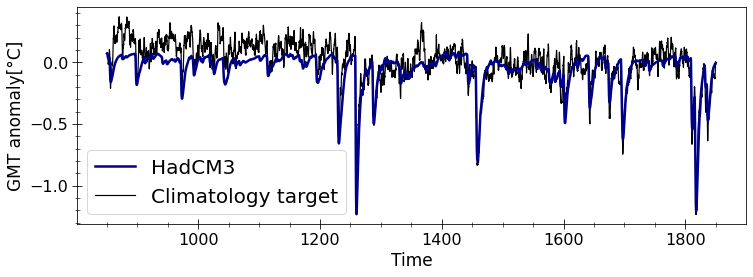

In [12]:
plt.figure(figsize=(12,4))
plt.plot(Time_HadCM3,data_dict_GMT['HadCM3_LGM_an'][:,2],color='darkblue',label='HadCM3',zorder=5)
#plt.plot(np.deg2rad(Lat_10),ZMT_CESM[:,0],color='darkgreen',label='CESM',zorder=5)
#plt.plot(np.deg2rad(Lat_10),ZMT_Pages[:,0],color='darkorange',label='Pages',zorder=5)
plt.plot(Time_HadCM3,Target_HadCM3_LGM,'k',label='Climatology target',linewidth=1.2)
#plt.xscale('latarea')
plt.xlabel('Time',fontsize=17)
plt.ylabel('GMT anomaly[°C]',fontsize=17)
#plt.ylim(-36,28)
plt.legend(fontsize=20)
#plt.savefig('../Latex/Figures/Clima_opti.png',format='PNG',dpi=400,bbox_inches='tight',transparency=True)

In [73]:
from matplotlib import colors
cols=np.array(['darkblue','blue','dodgerblue','lightblue',
               'darkviolet','violet',
               'darkgreen','limegreen',
               'darkorange','moccasin'])
cols_rgb=[colors.hex2color(colors.cnames[cols[i]]) for i in range(len(df_names))]
cols_rgb_dic={df_names[i]: colors.hex2color(colors.cnames[cols[i]]) for i in range(len(df_names))}
parameter_labels=['c_ao [m]','a [$Wm^{-2}$]','b [$Wm^{-2}K^{-1}$]','factor_oc','factor_kwv','factor_kair']


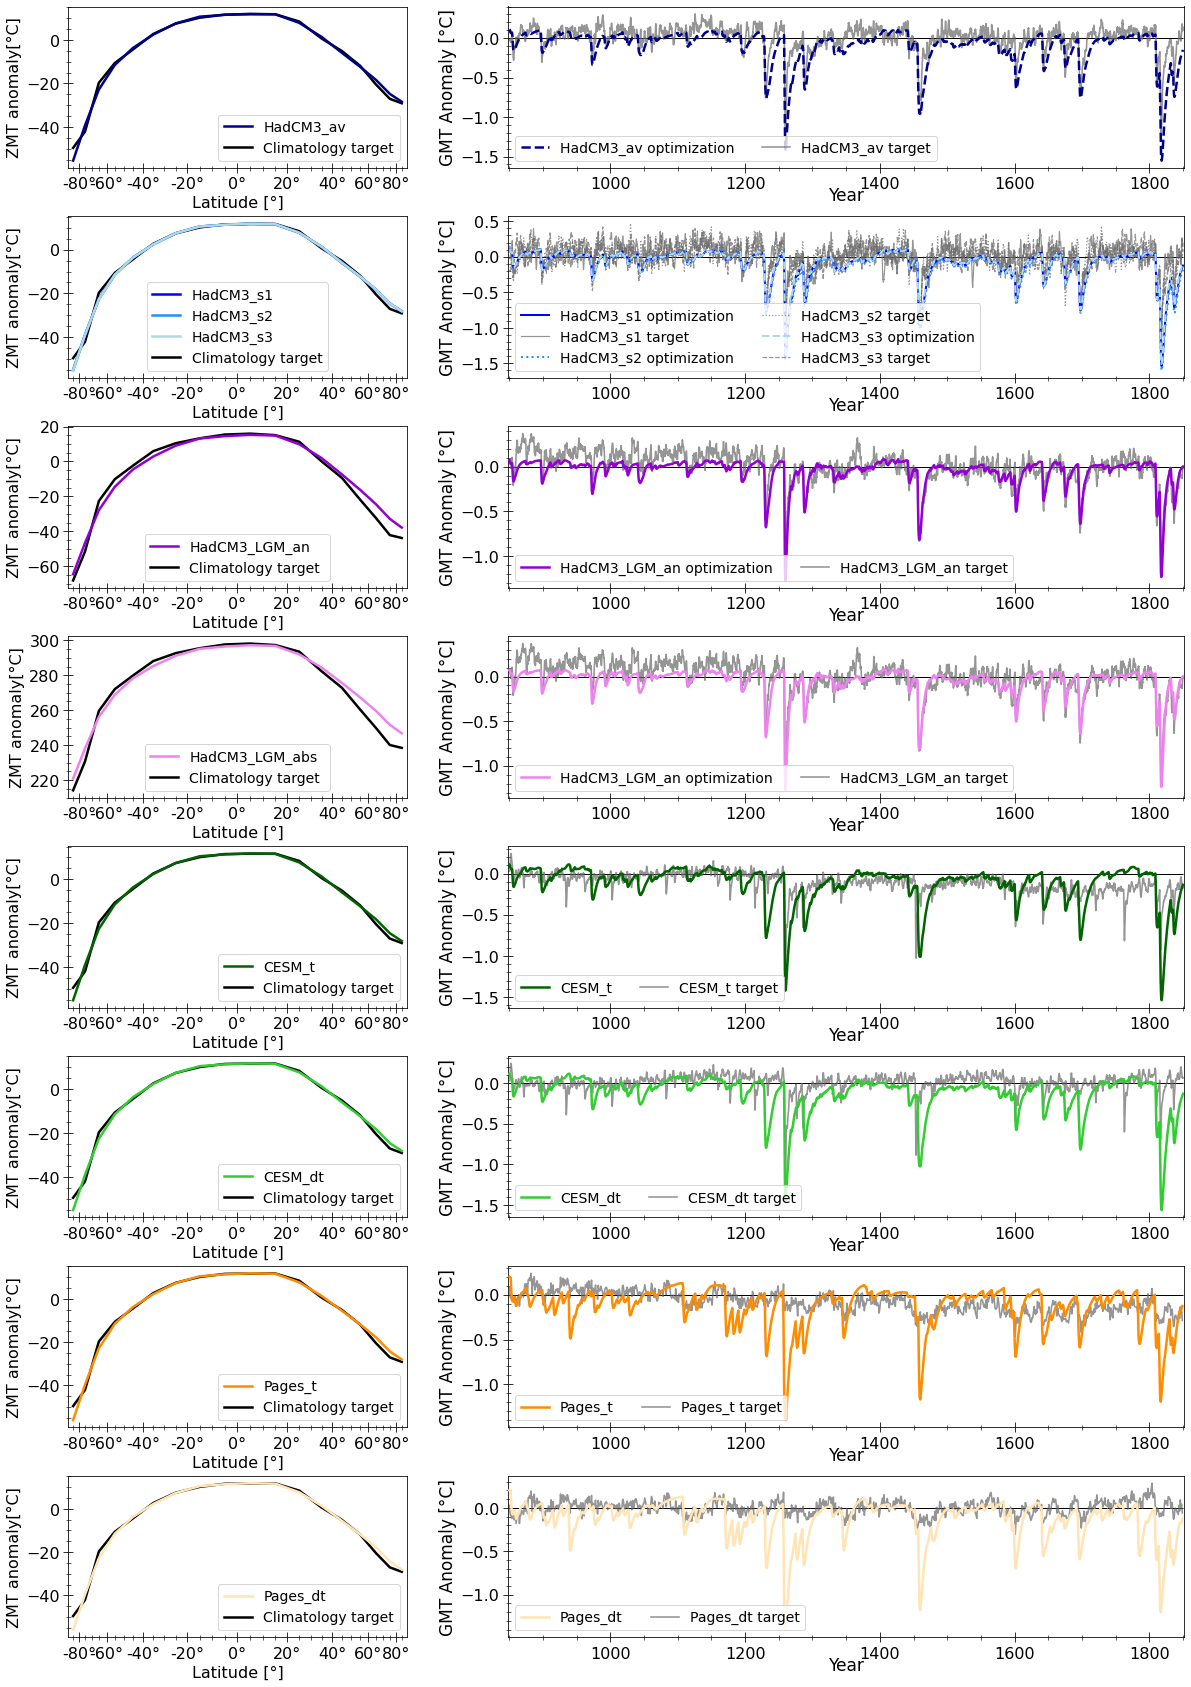

In [17]:
fig=plt.figure(figsize=(20,30))
gs = gridspec.GridSpec(8, 2, width_ratios=[1, 2]) 
ax=np.array([[plt.subplot(gs[i,0]),plt.subplot(gs[i,1])] for i in range(8)])

ax[0,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_av'][:,-1],color=cols_rgb[0],label='HadCM3_av',zorder=5)
ax[0,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

ax[1,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_s1'][:,-1],color=cols_rgb[1],label='HadCM3_s1',zorder=5)
ax[1,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_s2'][:,-1],color=cols_rgb[2],label='HadCM3_s2',zorder=5)
ax[1,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_s3'][:,-1],color=cols_rgb[3],label='HadCM3_s3',zorder=5)
ax[1,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

ax[2,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_LGM_an'][:,-1],color=cols_rgb[4],label='HadCM3_LGM_an',zorder=5)
ax[2,0].plot(np.deg2rad(Lat_10),ZMT_HadCM3_LGM_an,'k',label='Climatology target ',zorder=-1)

ax[3,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_LGM_abs'][:,-1],color=cols_rgb[5],label='HadCM3_LGM_abs',zorder=5)
ax[3,0].plot(np.deg2rad(Lat_10),ZMT_HadCM3_LGM_abs,'k',label='Climatology target ',zorder=-1)

for i in [6,7,8,9]:
    ax[i-2,0].plot(np.deg2rad(Lat_10),data_dict_ZMT[dict_names[i]][:,-1],color=cols_rgb[i],label=dict_names[i],zorder=5)
    ax[i-2,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

"""ax[5,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['CESM_dt'][:,-1],color=cols_rgb[5],label='CESM_dt',zorder=5)
ax[5,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

ax[6,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['Pages_t'][:,-1],color=cols_rgb[6],label='Pages_t',zorder=5)
ax[6,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

ax[7,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['Pages_dt'][:,-1],color=cols_rgb[7],label='Pages_dt',zorder=5)
ax[7,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

"""
ax[0,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_av'][:,-1],linewidth=2.5,alpha=1,linestyle='--',
             color=cols_rgb[0],label='HadCM3_av optimization',zorder=5)
ax[0,1].plot(Time_HadCM3,Target_HadCM3_av,color='dimgray',linewidth=1.6,alpha=.7, label='HadCM3_av target')

ax[1,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_s1'][:,-1],linewidth=2.0,alpha=1,color=cols_rgb[1]
             ,label='HadCM3_s1 optimization',zorder=5)
ax[1,1].plot(Time_HadCM3,Target_HadCM3_s1,color='dimgray',linewidth=1.2,alpha=.7
             , label='HadCM3_s1 target')
ax[1,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_s2'][:,-1],linewidth=2.0,alpha=1,linestyle=':',color=cols_rgb[2]
             ,label='HadCM3_s2 optimization',zorder=5)
ax[1,1].plot(Time_HadCM3,Target_HadCM3_s2,color='dimgray',linewidth=1.2,alpha=.7,linestyle=':'
             ,label='HadCM3_s2 target')
ax[1,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_s3'][:,-1],linewidth=2.0,alpha=1,linestyle='--',color=cols_rgb[3]
             ,label='HadCM3_s3 optimization',zorder=5)
ax[1,1].plot(Time_HadCM3,Target_HadCM3_s3,color='dimgray',linewidth=1.2,alpha=.7,linestyle='--'
             ,label='HadCM3_s3 target')

ax[2,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_LGM_an'][:,1],linewidth=2.5,alpha=1,color=cols_rgb[4],label='HadCM3_LGM_an optimization',zorder=5)
ax[2,1].plot(Time_HadCM3,Target_HadCM3_LGM,color='dimgray',linewidth=1.6,alpha=.7, label='HadCM3_LGM_an target')

ax[3,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_LGM_abs'][:,1],linewidth=2.5,alpha=1,color=cols_rgb[5],label='HadCM3_LGM_an optimization',zorder=5)
ax[3,1].plot(Time_HadCM3,Target_HadCM3_LGM,color='dimgray',linewidth=1.6,alpha=.7, label='HadCM3_LGM_abs target')

for i in [6,7,8,9]:
    ax[i-2,1].plot(data_dict_GMT_time[dict_names[i]],data_dict_GMT[dict_names[i]][:,-1],linewidth=2.5,alpha=1,color=cols_rgb[i],label=dict_names[i],zorder=5)
    ax[i-2,1].plot(data_dict_GMT_time[dict_names[i]],data_dict_GMT_target[dict_names[i]],color='dimgray',linewidth=1.6,alpha=.7, label=dict_names[i]+' target')

"""ax[5,1].plot(Time_CESM,data_dict_GMT['CESM_dt'][:,-1],linewidth=2.5,alpha=1,color='darkgreen',label='CESM_dt optimization',zorder=5)
ax[5,1].plot(Time_CESM,Target_CESM_dt,color='dimgray',linewidth=1.6,alpha=.7, label='CESM_dt target')

ax[6,1].plot(Time_Pages,data_dict_GMT['Pages_t'][:,-1],linewidth=2.5,alpha=1,color='darkorange',label='Pages2k_t optimization',zorder=5)
ax[6,1].plot(Time_Pages,Target_Pages_t,color='dimgray',linewidth=1.6,alpha=.7, label='Pages2k_t target')

ax[7,1].plot(Time_Pages,data_dict_GMT['Pages_dt'][:,-1],linewidth=2.5,alpha=1,color='darkorange',label='Pages2k_dt optimization',zorder=5)
ax[7,1].plot(Time_Pages,Target_Pages_dt,color='dimgray',linewidth=1.6,alpha=.7, label='Pages2k_dt target')
"""
for i in range(8):
    ax[i,0].set_xscale('latarea')
    ax[i,0].set_xlabel('Latitude [°]',fontsize=16)
    ax[i,0].set_ylabel('ZMT anomaly[°C]',fontsize=16)
    ax[i,0].legend(fontsize=14)

    ax[i,1].set_xlim(848,1852)
    ax[i,1].set_ylabel('GMT Anomaly [°C]',fontsize=17)
    ax[i,1].set_xlabel('Year',fontsize=17,labelpad=-5)
    ax[i,1].legend(fontsize=14,loc='lower left',ncol=2)
    ax[i,1].hlines(0,850,1850,linewidth=1)

plt.subplots_adjust(hspace=0.3)

In [80]:
df_abs.loc['LGM_forc']

,Unnamed: 0,F,dF,P,Ptrans,Gamma,ZMT,GMT
0,0,"[84.86022451840694, 84.85996294186381, 84.8604...","[2.6157358954748133, 0.6054325493920487, 8.615...","[0.9722767183661677, 0.9932274915674251, 0.889...","[0.43069179591541923, 0.4830687289185627, 0.22...",1.000000e-08,"[225.8128079742689, 242.15143297587824, 259.00...","[0.06235941275826917, 0.061972572779097845, 0...."
1,1,"[84.8602237040064, 84.85996212748597, 84.86048...","[2.6157360695577836, 0.6054326060223048, 8.615...","[0.9722767079032242, 0.9932274891456949, 0.889...","[0.4306917697580603, 0.4830687228642372, 0.223...",9.917644e-02,"[225.8128073789471, 242.15143246723872, 259.00...","[0.062359412758326016, 0.061972572779097845, 0..."
2,2,"[82.15018975330975, 82.14989387721653, 82.1504...","[2.9587387646756724, 0.651091893715261, 8.3938...","[0.8685089562649675, 0.9692096300709274, 0.8]","[0.17127239066241878, 0.42302407517731855, 0.0]",2.494576e-01,"[224.04512614356648, 240.64071029037672, 257.8...","[0.06235941275821233, 0.06197257277898416, 0.0..."
3,3,"[81.52934897494153, 81.52904476148956, 81.5296...","[3.042114629394632, 0.6637832109390729, 8.3384...","[0.8, 0.9042417012359626, 0.8]","[0.0, 0.26060425308990653, 0.0]",1.604468e+00,"[223.8362266214142, 240.47251602278368, 257.72...","[0.062359412758326016, 0.06197257277915469, 0...."
4,4,"[81.35626168079233, 81.35595592121693, 81.3565...","[3.057576973546361, 0.6644953254664188, 8.2662...","[0.8, 0.8, 0.8]","[0.0, 0.0, 0.0]",3.403505e-02,"[223.68864706614286, 240.36670011410592, 257.6...","[0.06235941275821233, 0.061972572779041, 0.061..."
5,5,"[81.35626168079233, 81.35595592121693, 81.3565...","[3.057576973546361, 0.6644953254664188, 8.2662...","[0.8, 0.8, 0.8]","[0.0, 0.0, 0.0]",NaN,"[223.68864706614286, 240.36670011410592, 257.6...","[0.06235941275821233, 0.061972572779041, 0.061..."
6,6,"[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]",NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
7,7,"[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]",NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
8,8,"[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]",NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
9,9,"[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]",NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


(4000.0, 6000.0)

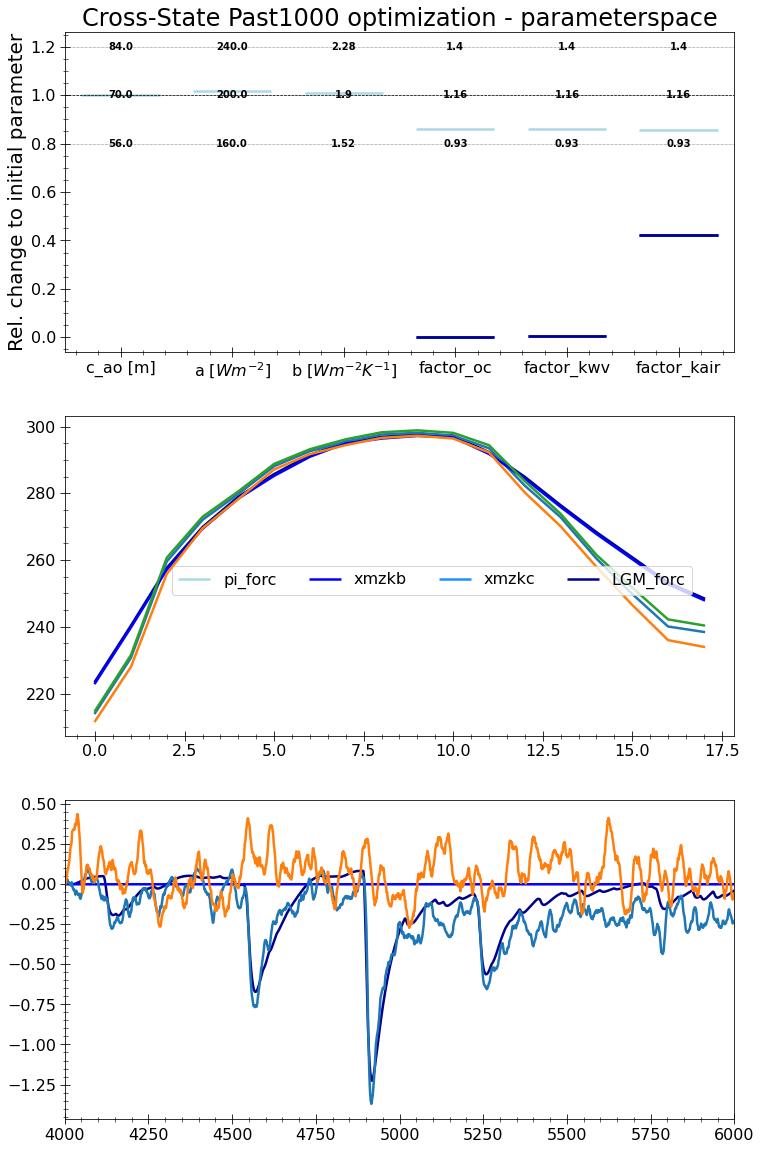

In [78]:
fig,ax = plt.subplots(3,1,figsize=(12,20))
P0=np.array([70,200,1.9,1.165,1.165,1.165])
Pmin=np.array([1,170,1.3,0.9,0.9,0.9])
Pmax=np.array([100,240,2.5,1.3,1.3,1.3])
data=df_abs
#all_paras=dict()#np.array([[data_dict_P[i][k,-1] if i in ['HadCM3_LGM_abs','HadCM3_LGM_an'] else data_dict_P[i][k,0] for i in data_dict_P] for k in range(6)])
#HadCM3_labels=['HadCM3_av','HadCM3_s1','HadCM3_s2','HadCM3_s3','HadCM3_LGM_abs','HadCM3_LGM_an']

#all_paras={i: [data_dict_P[i][k,-1]/4.2e6 if i in ['HadCM3_LGM_abs','HadCM3_LGM_an'] else data_dict_P[i][k,0]/4.2e6 if k==0
#               else data_dict_P[i][k,-1] if i in ['HadCM3_LGM_abs','HadCM3_LGM_an'] else data_dict_P[i][k,0] for k in range(6)] for i in data_dict_P}
#all_paras={i: [data_dict_P[i][k,-1] if i in ['HadCM3_LGM_abs','HadCM3_LGM_an'] else data_dict_P[i][k,-1] for k in range(6)] for i in data_dict_P}
#all_paras=all_paras[0]/4.2e6


#for run in df_names:
step= 5
for run in PI_forc:
    for p in range(6):
        if p==0:
            ax[0].eventplot(np.vstack(data['P'].loc[run,step])[p]/P0[p]/4.2e6,orientation='vertical',lineoffsets=p,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb_dic[run],label=run)
        else:

            ax[0].eventplot(np.vstack(data['P'].loc[run,step])[p]/P0[p],orientation='vertical',lineoffsets=p,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb_dic[run])
for run in LGM_pm+LGM_forc:
    for p in range(3):
        if p==0:
            ax[0].eventplot(np.vstack(data['P'].loc[run,step])[p]/P0[p]/4.2e6,orientation='vertical',lineoffsets=p+3,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb_dic[run],label=run)
        else:

            ax[0].eventplot(np.vstack(data['P'].loc[run,step])[p]/P0[p],orientation='vertical',lineoffsets=p+3,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb_dic[run])

            
ax[0].hlines(1,-1,6,linewidth=0.7,linestyle='--')
ax[0].set_xlim(-0.5,5.5)
#plt.ylim(0.89,1.16)
for h in [0.8,1,1.2]:#[0.6,0.8,1,1.2,1.4]:#
    for i in range(6):
        ax[0].text(i,h,str(np.round(h*P0[i],2)),horizontalalignment='center',verticalalignment='center',fontweight='bold')
    ax[0].hlines(h,-1,6,linewidth=0.5,linestyle=':')
ax[0].set_xticks(np.arange(6))
ax[0].set_xticklabels(parameter_labels)
ax[0].set_ylabel('Rel. change to initial parameter')
ax[0].set_title('Cross-State Past1000 optimization - parameterspace')
fig.legend(loc='lower center',ncol=4,bbox_to_anchor=(0.5,0.38),fontsize=16)


for run in LGM_forc+LGM_pm:
    ax[1].plot(data.loc[run,'ZMT'][step],linewidth=2.5,c=cols_rgb_dic[run])#,label=run)
    ax[1].plot(HadCM3_ZMT[run])
    
for run in LGM_forc+LGM_pm:
    ax[2].plot(data.loc[run,'GMT'][step],linewidth=2.5,c=cols_rgb_dic[run])#,label=run)
ax[2].plot(HadCM3_GMT_anomaly['LGM_forc'])
ax[2].plot(HadCM3_GMT_anomaly['xmzkc'])
ax[2].set_xlim(4000,6000)
#print(Pmin/P0)
#print(Pmax/P0)

In [120]:
np.vstack(df_abs['F'].loc['pi_forc'])[:,0]

array([113.63092327, 113.61632813, 147.50309717, 110.24555291,
       102.49415867,  71.76822255,  70.76447047,  70.29118838,
        70.12688187,  70.09636543, 179.08083018, 317.876038  ,
       204.3419264 , 157.45710546,  76.99731773,  75.6198048 ,
        74.07338209,  73.70881389,  56.47548556,  49.84194171])

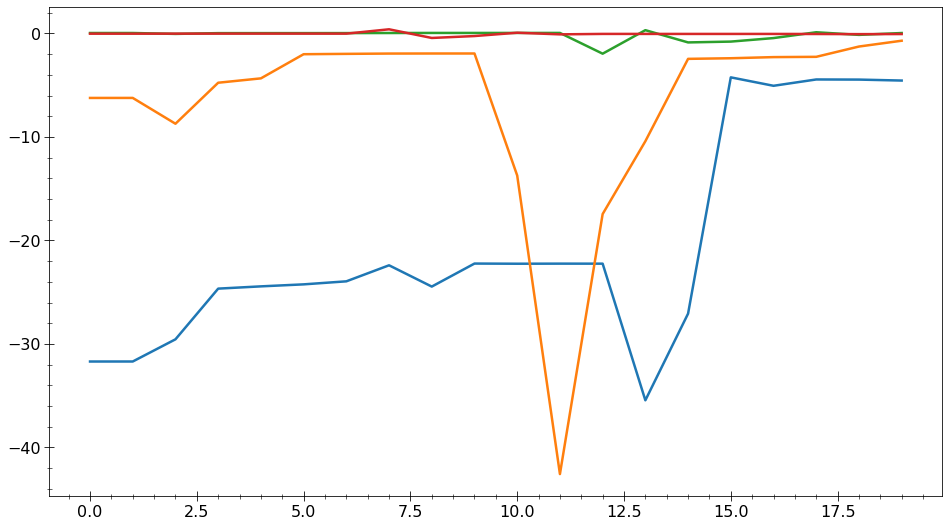

In [134]:
for var in LGM_forc+PI_forc+LGM_pm:
    plt.plot(np.vstack(np.array(df_abs.loc[var,'dF']))[:,0])
#plt.yscale('log')

In [7]:
plt.figure(figsize=(12,12))
P0=np.array([70,200,1.9,1.165,1.165,1.165])
Pmin=np.array([1,170,1.3,0.9,0.9,0.9])
Pmax=np.array([100,240,2.5,1.3,1.3,1.3])
#all_paras=np.array([[list(data_dict_P.values())[i][k,0] for i in range(10)] for k in range(6)])
#all_paras[0]=all_paras[0]/4.2e6
Model_labels=['HadCM3_av','HadCM3_s1','HadCM3_s2','HadCM3_s3','CESM_t','CESM_dt',
       'Pages_t','Pages_dt']

for k in range(6):
    for i in Model_labels:
        if k==0:
            plt.eventplot([all_paras[i][k]/P0[k]/4.2e6],orientation='vertical',lineoffsets=k,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb_dic[i],label=i)
        else:
            
            plt.eventplot([all_paras[i][k]/P0[k]],orientation='vertical',lineoffsets=k,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb_dic[i])
plt.hlines(1,-1,6,linewidth=0.7,linestyle='--')
plt.xlim(-0.5,5.5)
#plt.ylim(0.88,1.13)
for h in [0.9,1,1.1]:#[0.6,0.8,1,1.2,1.4]:#
    for i in range(6):
        plt.text(i,h,str(np.round(h*P0[i],2)),horizontalalignment='center',verticalalignment='center',fontweight='bold')
    plt.hlines(h,-1,6,linewidth=0.5,linestyle=':')
plt.xticks(np.arange(6),parameter_labels)
plt.ylabel('Rel. change to initial parameter')
plt.title('Cross-target Past1000 optimization - parameterspace')
plt.legend(loc='center right',bbox_to_anchor=(1.32,0.5),fontsize=16)
#plt.savefig('../Latex/Figures/Cross_target_optim.png',dpi=400,transparent=True,bbox_inches='tight')

NameError: name 'all_paras' is not defined

<Figure size 864x864 with 0 Axes>

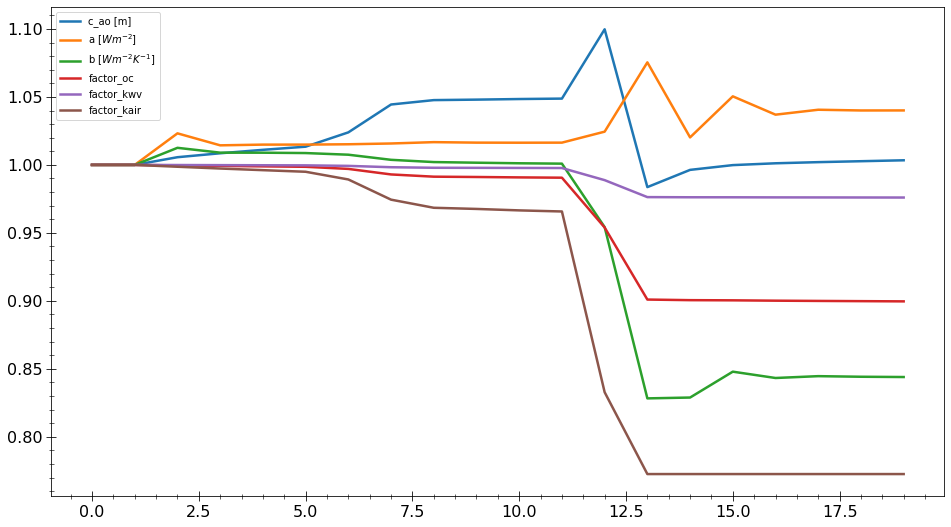

In [8]:
for i in range(6):
    if i==0:
        plt.plot(data_dict_P['HadCM3_LGM_abs'][0]/P0[0]/4.2e6,label=parameter_labels[0])
    else:
        plt.plot(data_dict_P['HadCM3_LGM_abs'][i]/P0[i],label=parameter_labels[i])
plt.legend()

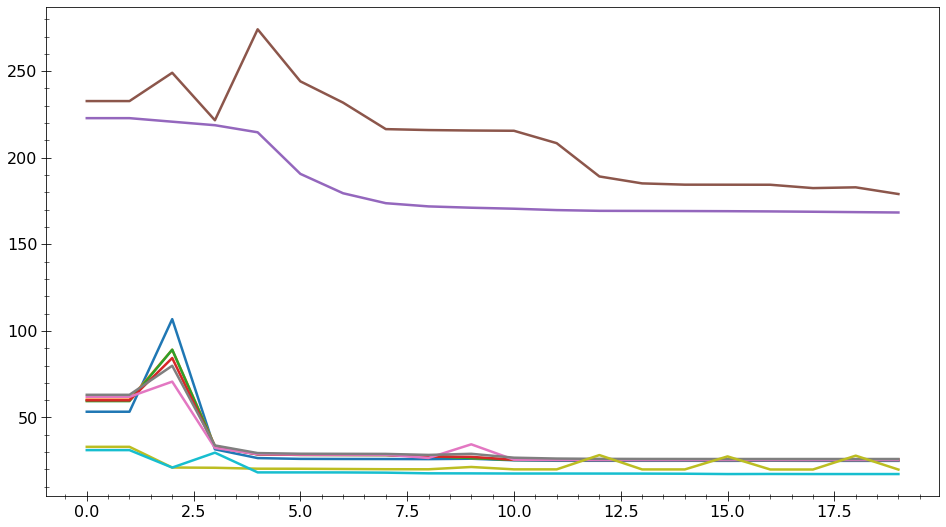

In [80]:
for i in range(10):
    plt.plot(data_dict_F[dict_names[i]][0])
#plt.yscale('log')